In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_original = pd.read_excel('data-5features-all-outputs.xlsx')
df_all = pd.read_excel('All_data_correct.xlsx')

In [26]:
df = df_original.iloc[:,2:]

In [19]:
df_all[df_all['country data collected'] == 'Brazil'].count()

Ericsson location           0
Participant ID              0
Data source               119
country data collected    119
Role                      119
Team ID                   119
Gender                    119
Age                       119
Country                   119
Extraversion              119
Friendliness              119
Gregariousness            119
Assertiveness             119
Activity Level            119
Excitement-Seeking        119
Cheerfulness              119
Agreeableness             119
Trust                     119
Morality                  119
Altruism                  119
Cooperation               119
Modesty                   119
Sympathy                  119
Conscientiousness         119
Self-Efficacy             119
Orderliness               119
Dutifulness               119
Achievement-Striving      119
Self-Discipline           119
Cautiousness              119
Neuroticism               119
Anxiety                   119
Anger                     119
Depression

# Preprocessing data

Identify any missing values in the dataset

In [93]:
df.isnull().sum()

Extraversion              0
Agreeableness             0
Conscientiousness         0
Neuroticism               0
Openness                  0
Vision                    0
Task_Orientation          0
Support_for_innovation    0
Participative_safety      0
Team_Climate              0
dtype: int64

Employ normalization to ensure that all features have a consistent scale. ??? 

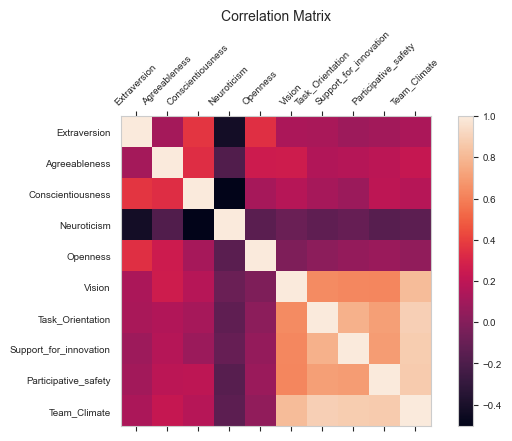

In [94]:
f = plt.figure(figsize=(7, 4))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=7, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=7)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=7)
plt.title('Correlation Matrix', fontsize=10);
plt.grid(None)

In [39]:
# I have selected the other 4 outputs variables to predict the final target, team climate.
target = df.iloc[:,-1:]
variables = df.iloc[:,5:9]

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

In [81]:
X_train, X_test, y_train, y_test = train_test_split(variables, np.ravel(target), test_size=0.2, random_state=42)

rft = RandomForestRegressor(n_estimators=100, max_features=5, max_depth=9, random_state=42)
rft.fit(X_train, y_train)
y_pred = rft.predict(X_test)

score = rft.score(X_test, y_test)
score

0.9468237115684145

In [103]:
rft_importances = pd.Series(rft.feature_importances_, index=list(variables)).sort_values()
rft_importances

Vision                    0.078691
Support_for_innovation    0.161681
Task_Orientation          0.260572
Participative_safety      0.499057
dtype: float64

We can see that the attribute Participative_safety has the most influence in predicting the team climate in the model